In [3]:
import json
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
from helpers import plotOwners, plotNewOwners, remove0s, count0s

In [4]:
client = MongoClient('localhost', 27017)
db = client.steamspy

In [5]:
#creating new columns to be used for data and casting things as ints
data = pd.DataFrame(list(db.clean.find()))
data.drop(columns = "_id", inplace = True) #drop _id column
#making price column ints and making price of free games 0
data['price'] = data['price'].fillna(0)
data['price'] = data['price'].astype(int)
data['negative'] = data['negative'].astype(int)
data['positive'] = data['positive'].astype(int)
data['Like/Dislike Ratio'] = data['positive']/data['negative']

In [6]:
data = data[data['Genres'].apply(lambda x: 'Indie' in x)]
data = data[data.price == 0]

In [5]:
action = data[data['Genres'].apply(lambda x: 'Action' in x)]
strategy = data[data['Genres'].apply(lambda x: 'Strategy' in x)]
rpg = data[data['Genres'].apply(lambda x: 'RPG' in x)]
adventure = data[data['Genres'].apply(lambda x: 'Adventure' in x)]
sports = data[data['Genres'].apply(lambda x: 'Sports' in x)]
simulation = data[data['Genres'].apply(lambda x: 'Simulation' in x)]
mmo = data[data['Genres'].apply(lambda x: 'MMO' in x)]
theGenres = [action, strategy, rpg, adventure, sports, simulation, mmo]
genreNames = ['Action', 'Strategy', 'RPG', 'Adventure', 'Sports',
              'Simulation', 'MMO']

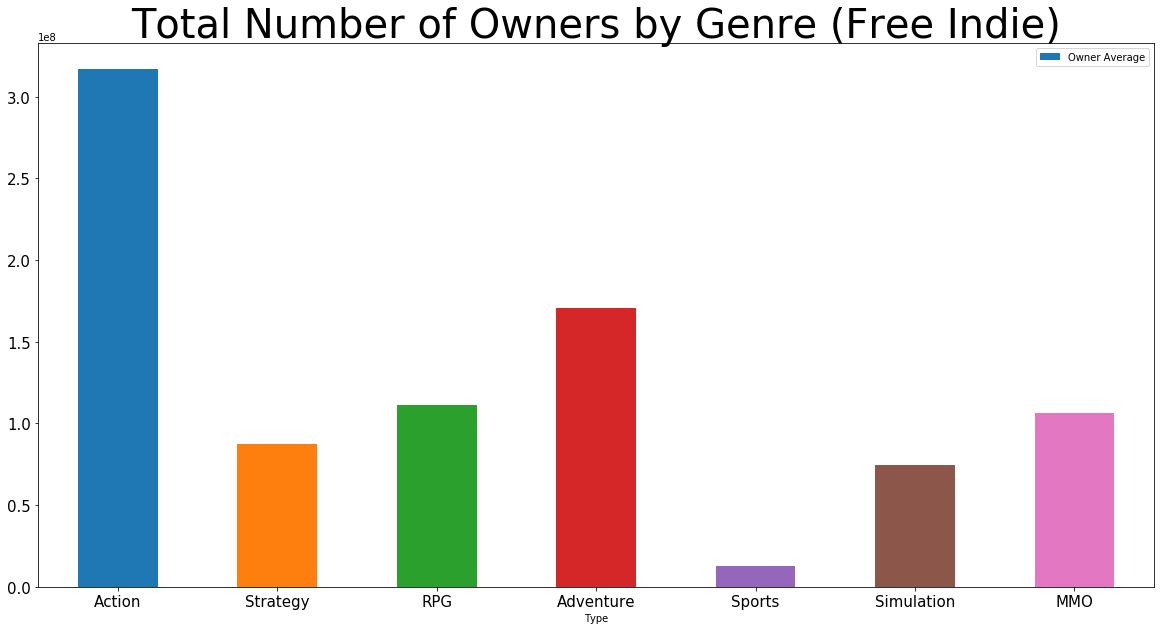

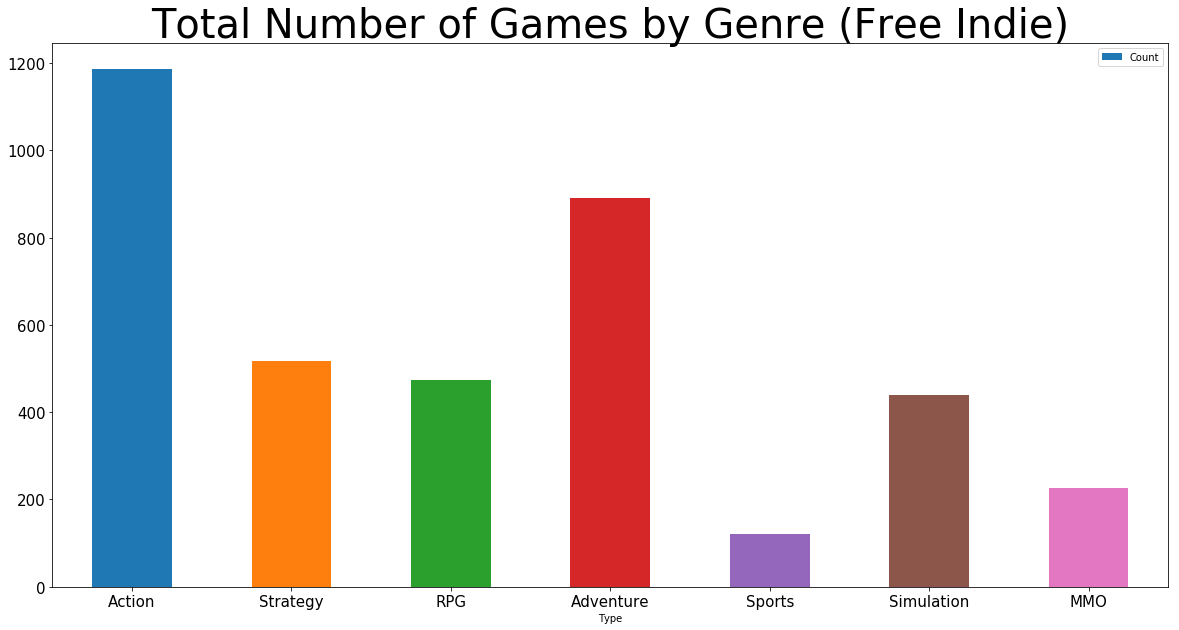

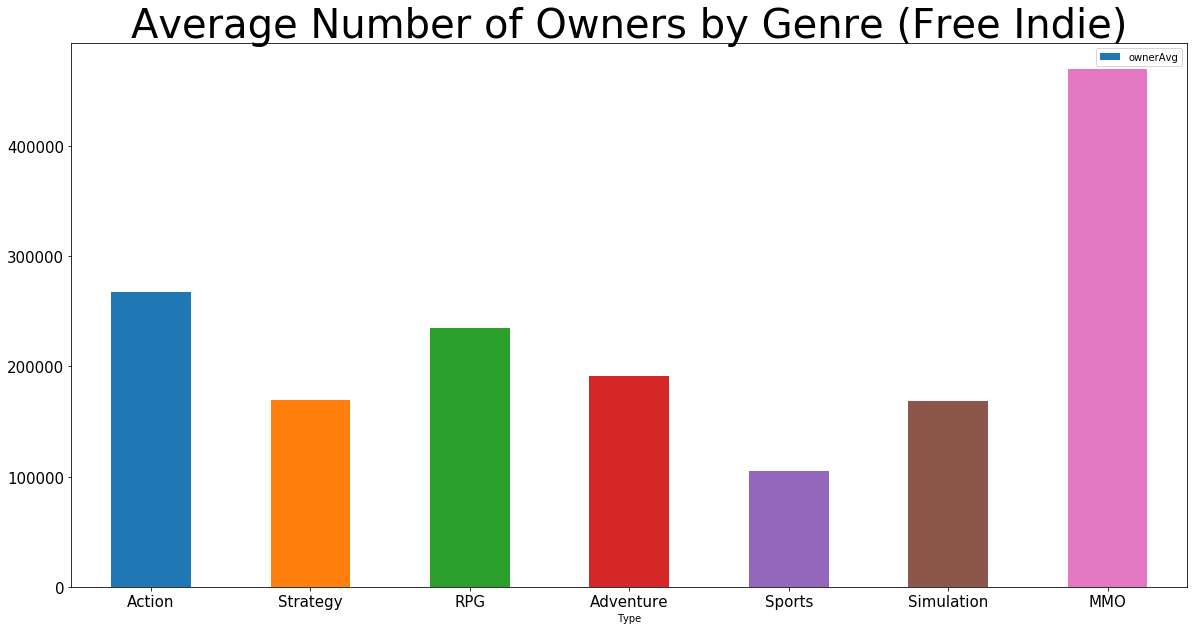

In [6]:
plotOwners(theGenres, genreNames, title1 = "Total Number of Owners by Genre (Free Indie)",
           title2 = "Total Number of Games by Genre (Free Indie)",
           title3 = "Average Number of Owners by Genre (Free Indie)")

In [ ]:
numberOf0 = []
for genre in theGenres:
    numberOf0.append(count0s(genre))
count0 = pd.DataFrame({'Genre':genreNames, 'Number of 0s': numberOf0})
print(count0)

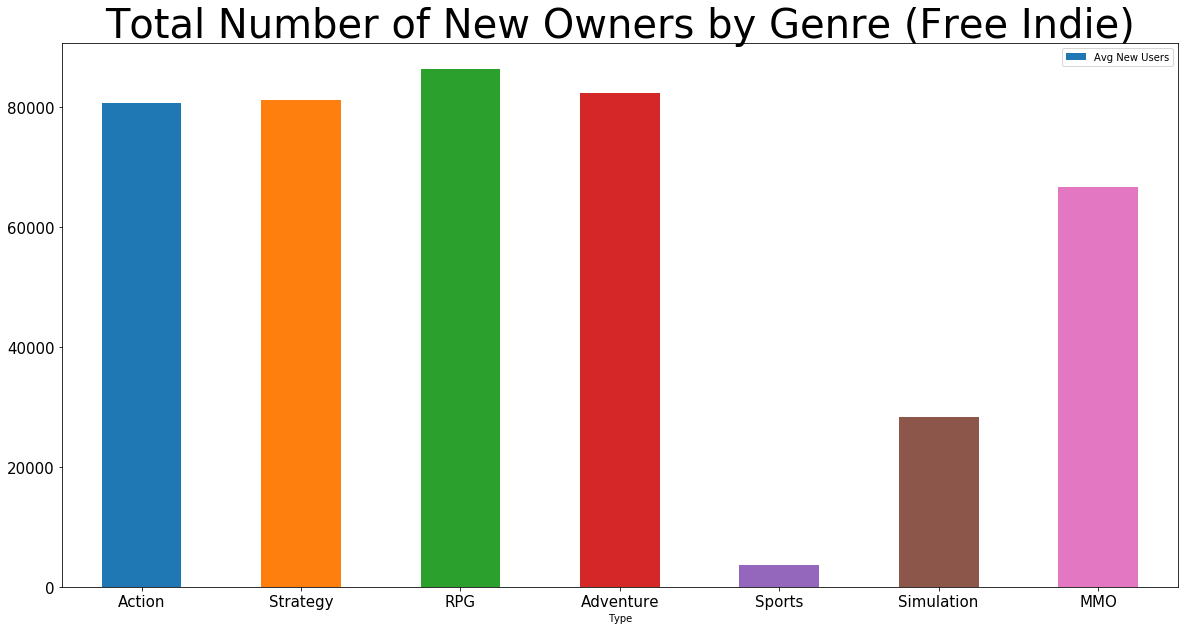

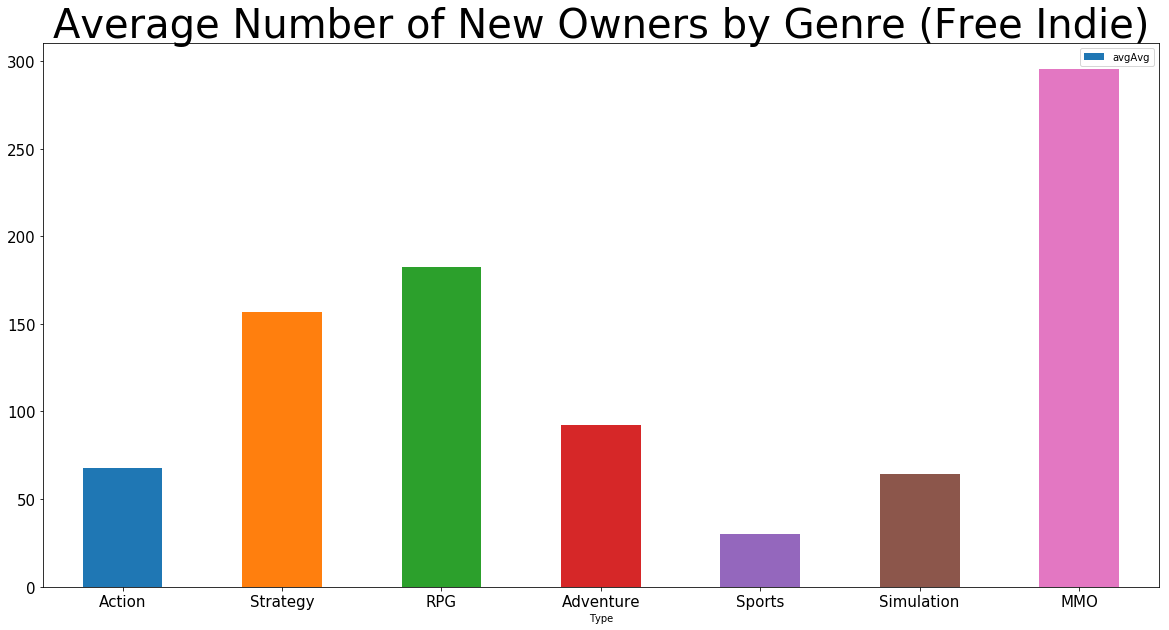

In [7]:
plotNewOwners(theGenres, genreNames, title1 = "Total Number of New Owners by Genre (Free Indie)",
              title3 = "Average Number of New Owners by Genre (Free Indie)")

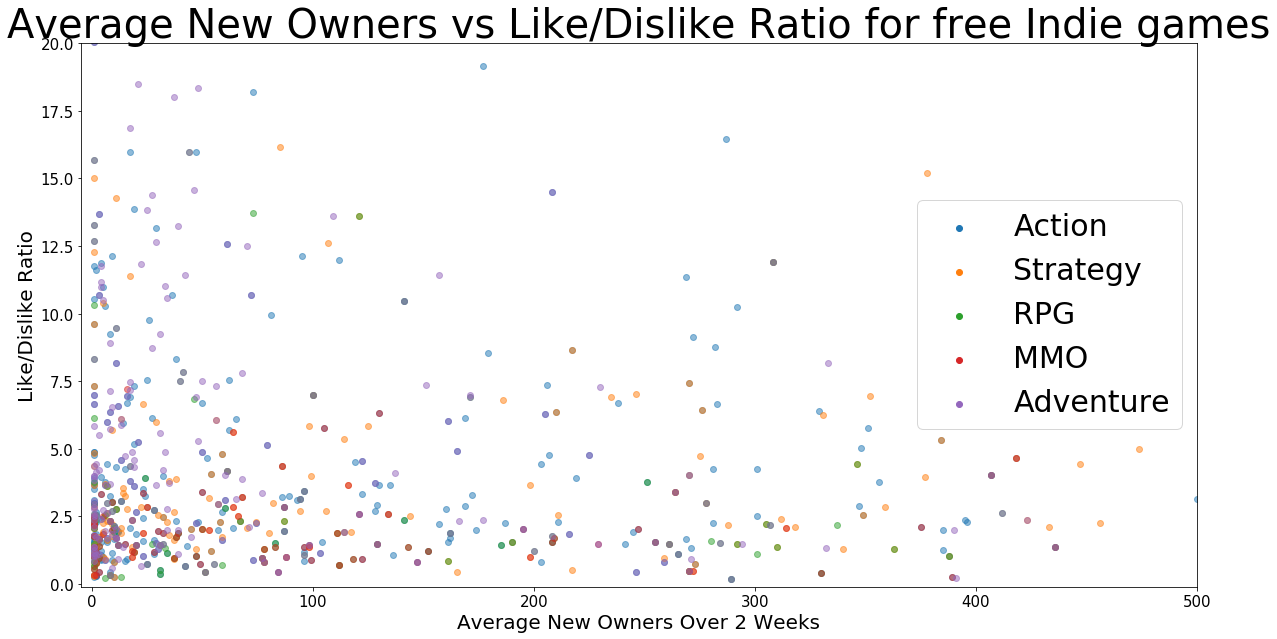

In [8]:
#average new owners vs like/dislike for free top 3 genres
theGenres = [action, strategy, rpg, mmo, adventure]
theGenres0 = []
for genre in theGenres:
    theGenres0.append(remove0s(genre))
genreNames = ['Action', 'Strategy', 'RPG', 'MMO', 'Adventure']
fig, ax = plt.subplots(figsize=(20,10))
for genre in theGenres0:
    ax.scatter(genre['average_forever'], genre['Like/Dislike Ratio'], alpha=0.5)
plt.xlim(-5, 500)
plt.ylim(-0.1, 20)
leg = ax.legend(genreNames, fontsize = 30)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax.set_title("Average New Owners vs Like/Dislike Ratio for free Indie games", fontsize = 40)
ax.set_xlabel("Average New Owners Over 2 Weeks", fontsize = 20)
ax.set_ylabel("Like/Dislike Ratio", fontsize = 20)
ax.tick_params(axis = 'both', labelsize = 15)

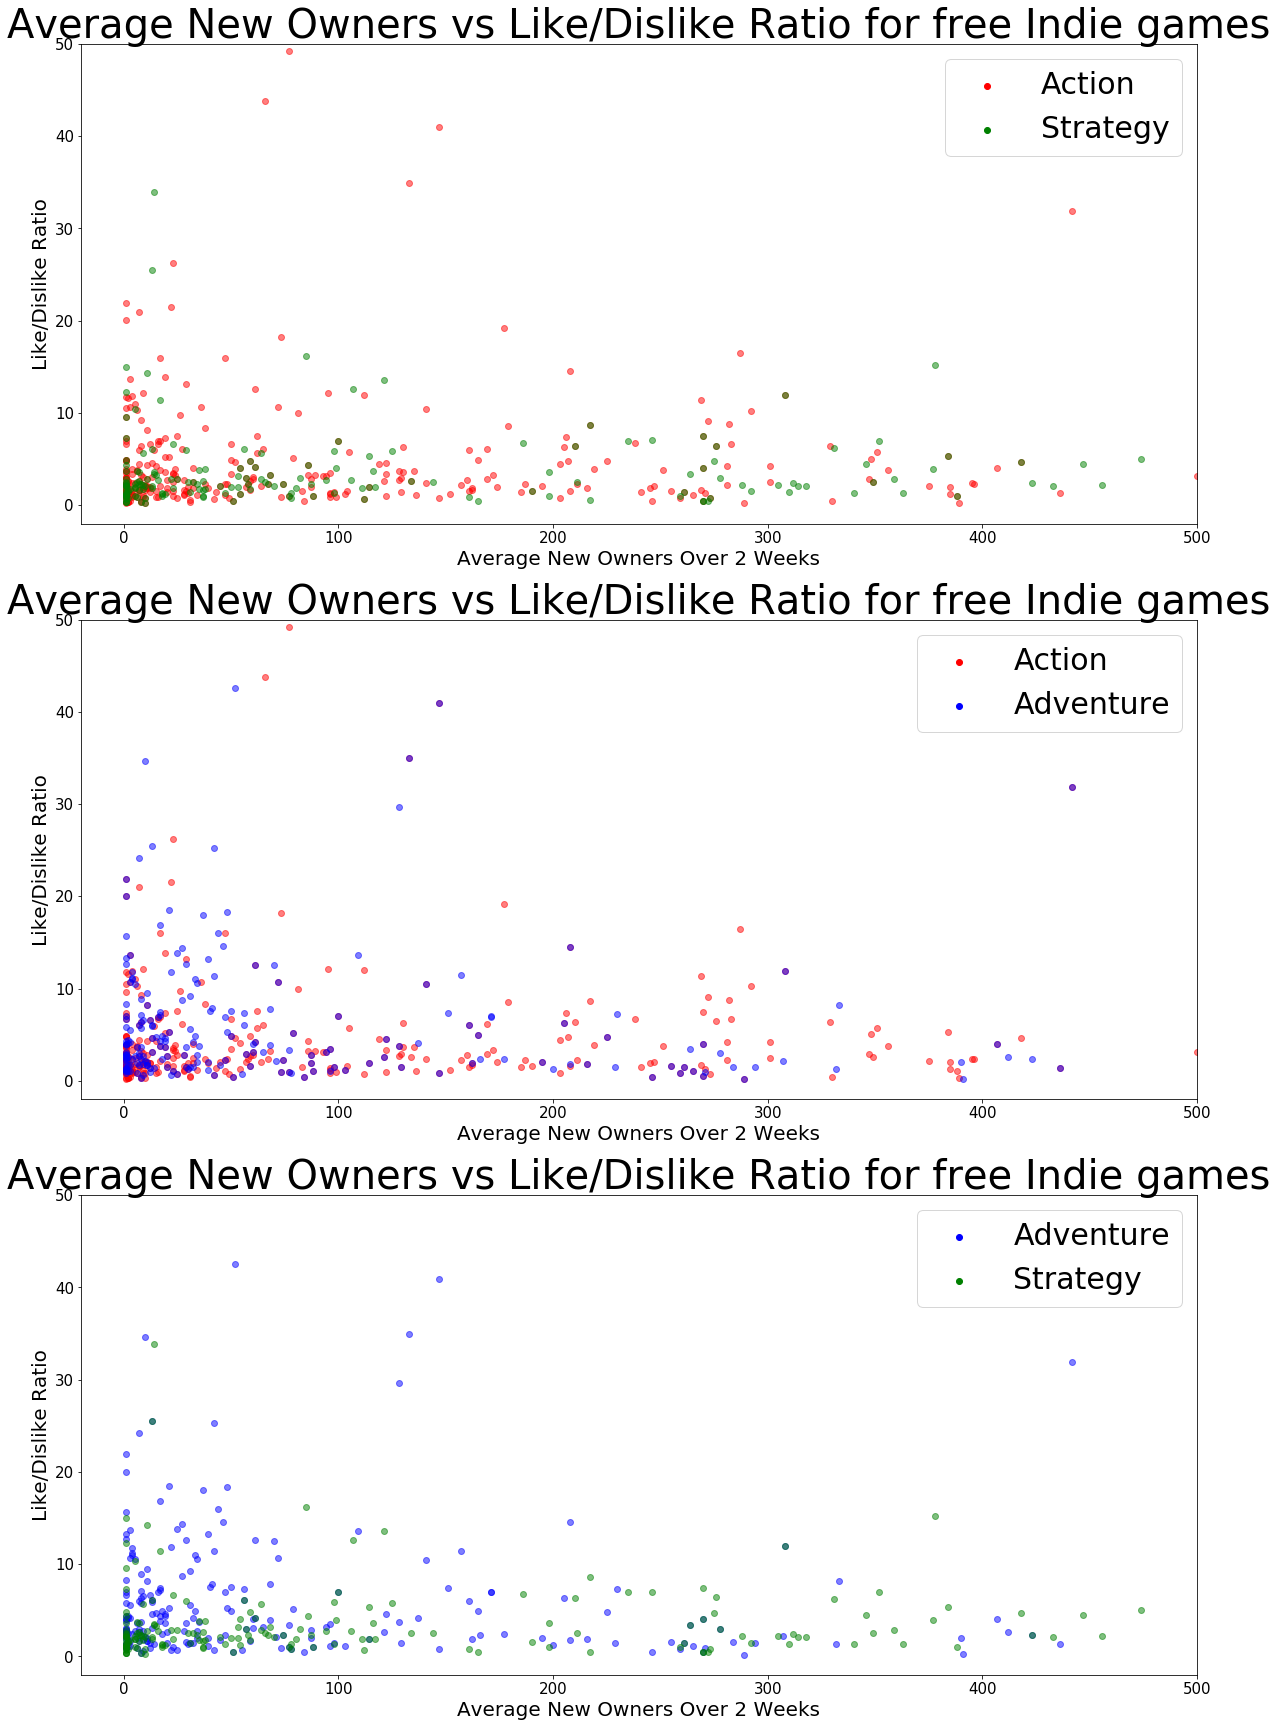

In [9]:
#median new owners vs like/dislike for free top 3 genres
action = remove0s(action)
strategy = remove0s(strategy)
adventure = remove0s(adventure)

fig, ax = plt.subplots(3,1, figsize=(20,30))
ax[0].scatter(action['average_forever'], action['Like/Dislike Ratio'], c = 'red', alpha=0.5)
ax[0].scatter(strategy['average_forever'], strategy['Like/Dislike Ratio'], c = 'green', alpha=0.5)
ax[0].set_xlim(-20, 500)
ax[0].set_ylim(-2, 50)
leg = ax[0].legend(['Action', 'Strategy'], fontsize = 30)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax[0].set_title("Average New Owners vs Like/Dislike Ratio for free Indie games", fontsize = 40)
ax[0].set_xlabel("Average New Owners Over 2 Weeks", fontsize = 20)
ax[0].set_ylabel("Like/Dislike Ratio", fontsize = 20)
ax[0].tick_params(axis = 'both', labelsize = 15)

ax[1].scatter(action['average_forever'], action['Like/Dislike Ratio'], c = 'red', alpha=0.5)
ax[1].scatter(adventure['average_forever'], adventure['Like/Dislike Ratio'], c = 'blue', alpha=0.5)
ax[1].set_xlim(-20, 500)
ax[1].set_ylim(-2, 50)
leg = ax[1].legend(['Action', 'Adventure'], fontsize = 30)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax[1].set_title("Average New Owners vs Like/Dislike Ratio for free Indie games", fontsize = 40)
ax[1].set_xlabel("Average New Owners Over 2 Weeks", fontsize = 20)
ax[1].set_ylabel("Like/Dislike Ratio", fontsize = 20)
ax[1].tick_params(axis = 'both', labelsize = 15)

ax[2].scatter(adventure['average_forever'], adventure['Like/Dislike Ratio'], c = 'blue', alpha=0.5)
ax[2].scatter(strategy['average_forever'], strategy['Like/Dislike Ratio'], c = 'green', alpha=0.5)
ax[2].set_xlim(-20, 500)
ax[2].set_ylim(-2, 50)
leg = ax[2].legend(['Adventure', 'Strategy'], fontsize = 30)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax[2].set_title("Average New Owners vs Like/Dislike Ratio for free Indie games", fontsize = 40)
ax[2].set_xlabel("Average New Owners Over 2 Weeks", fontsize = 20)
ax[2].set_ylabel("Like/Dislike Ratio", fontsize = 20)
ax[2].tick_params(axis = 'both', labelsize = 15)

In [10]:
casual = data[data['Tags'].apply(lambda x: 'Casual' in x)]
soundtrack = data[data['Tags'].apply(lambda x: 'Great+Soundtrack' in x)]
atmospheric = data[data['Tags'].apply(lambda x: 'Atmospheric' in x)]
twoD = data[data['Tags'].apply(lambda x: '2D' in x)]
puzzle = data[data['Tags'].apply(lambda x: 'Puzzle' in x)]
openWorld = data[data['Tags'].apply(lambda x: 'Open+World' in x)]
storyRich = data[data['Tags'].apply(lambda x: 'Story+Rich' in x)]
coop = data[data['Tags'].apply(lambda x: 'Co-op' in x)]
difficult = data[data['Tags'].apply(lambda x: 'Difficult' in x)]
shooter = data[data['Tags'].apply(lambda x: 'Shooter' in x)]
scifi = data[data['Tags'].apply(lambda x: 'Sci-fi' in x)]
firstPerson = data[data['Tags'].apply(lambda x: 'First-Person' in x)]
horror = data[data['Tags'].apply(lambda x: 'Horror' in x)]
vr = data[data['Tags'].apply(lambda x: 'VR' in x)]
anime = data[data['Tags'].apply(lambda x: 'Anime' in x)]
pixelGraphics = data[data['Tags'].apply(lambda x: 'Pixel+Graphics' in x)]
funny = data[data['Tags'].apply(lambda x: 'Funny' in x)]
fantasy = data[data['Tags'].apply(lambda x: 'Fantasy' in x)]
platformer = data[data['Tags'].apply(lambda x: 'Platformer' in x)]
femaleProtagonist = data[data['Tags'].apply(lambda x: 'Female+Protagonist' in x)]
fps = data[data['Tags'].apply(lambda x: 'FPS' in x)]
survival = data[data['Tags'].apply(lambda x: 'Survival' in x)]
gore = data[data['Tags'].apply(lambda x: 'Gore' in x)]
violent = data[data['Tags'].apply(lambda x: 'Violent' in x)]
sandbox = data[data['Tags'].apply(lambda x: 'Sandbox' in x)]
comedy = data[data['Tags'].apply(lambda x: 'Comedy' in x)]
arcade = data[data['Tags'].apply(lambda x: 'Arcade' in x)]
classic = data[data['Tags'].apply(lambda x: 'Classic' in x)]
nudity = data[data['Tags'].apply(lambda x: 'Nudity' in x)]
onlineCoop = data[data['Tags'].apply(lambda x: 'Online+Co-op' in x)]
tactical = data[data['Tags'].apply(lambda x: 'Tactical' in x)]
zombies = data[data['Tags'].apply(lambda x: 'Zombies' in x)]
teamBased = data[data['Tags'].apply(lambda x: 'Team-Based' in x)]
pve = data[data['Tags'].apply(lambda x: 'PvE' in x)]
pvp = data[data['Tags'].apply(lambda x: 'PvP' in x)]
war = data[data['Tags'].apply(lambda x: 'War' in x)]
controller = data[data['Tags'].apply(lambda x: 'Controller' in x)]

In [11]:
tags = [casual, soundtrack, atmospheric, twoD, puzzle, openWorld, storyRich, coop, difficult, shooter, scifi,
       firstPerson, horror, vr, anime, pixelGraphics, funny, fantasy, platformer, femaleProtagonist, fps, 
       survival, gore, violent, sandbox, comedy, arcade, classic, nudity, onlineCoop, tactical, zombies, teamBased,
       pve, pvp, war, controller]
tagNames = ['Casual', 'Great Soundtrack', 'Atmospheric', '2D', 'Puzzle', 'Open World', 'Story Rich', 'Co-op',
           'Difficult', 'Shooter', 'Sci-fi', 'First-Person', 'Horror', 'VR', 'Anime', 'Pixel Graphics', 'Funny',
           'Fantasy', 'Platformer', 'Female Protagonist', 'FPS', 'Survival', 'Gore', 'Violent', 'Sandbox', 'Comedy',
           'Arcade', 'Classic', 'Nudity', 'Online Co-op', 'Tactical', 'Zombies', 'Team-Based', 'PvE', 'PvP', 'War',
           'Controller']

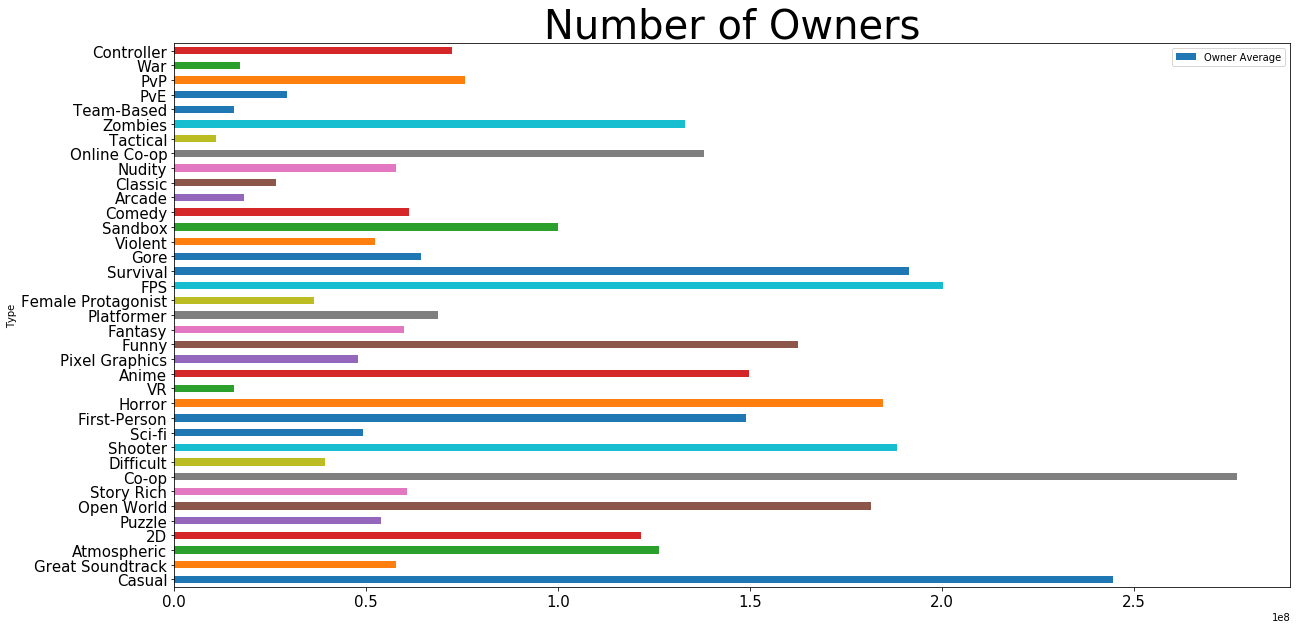

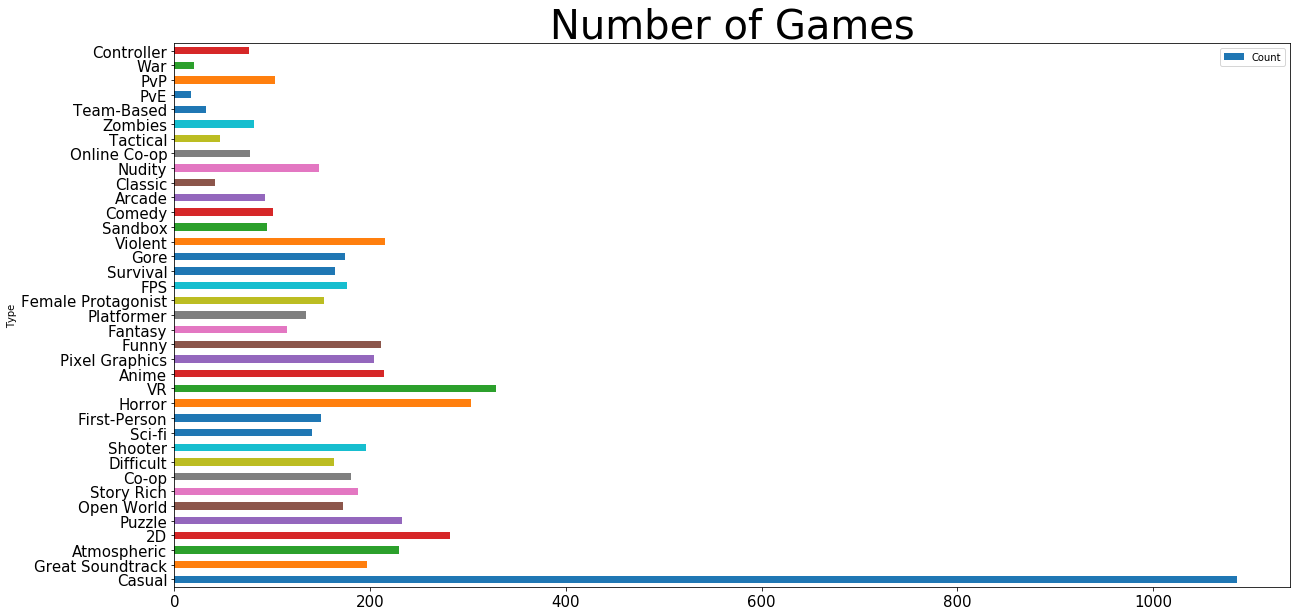

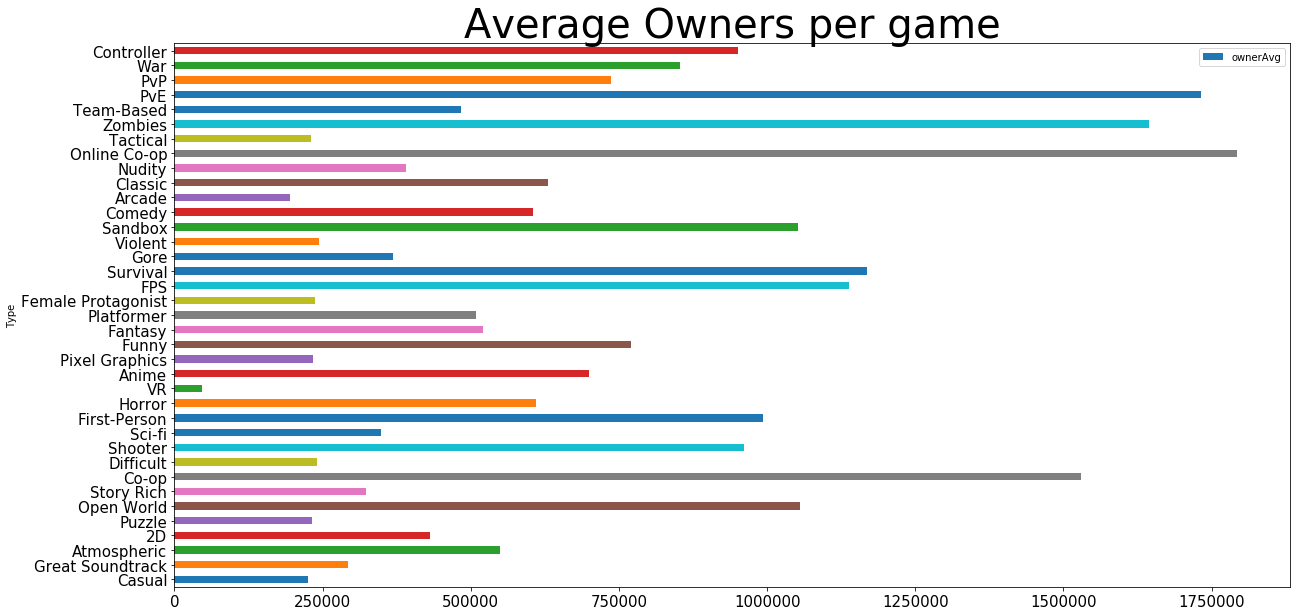

In [12]:
#owners of tags
plotOwners(tags, tagNames, horizontal = True)

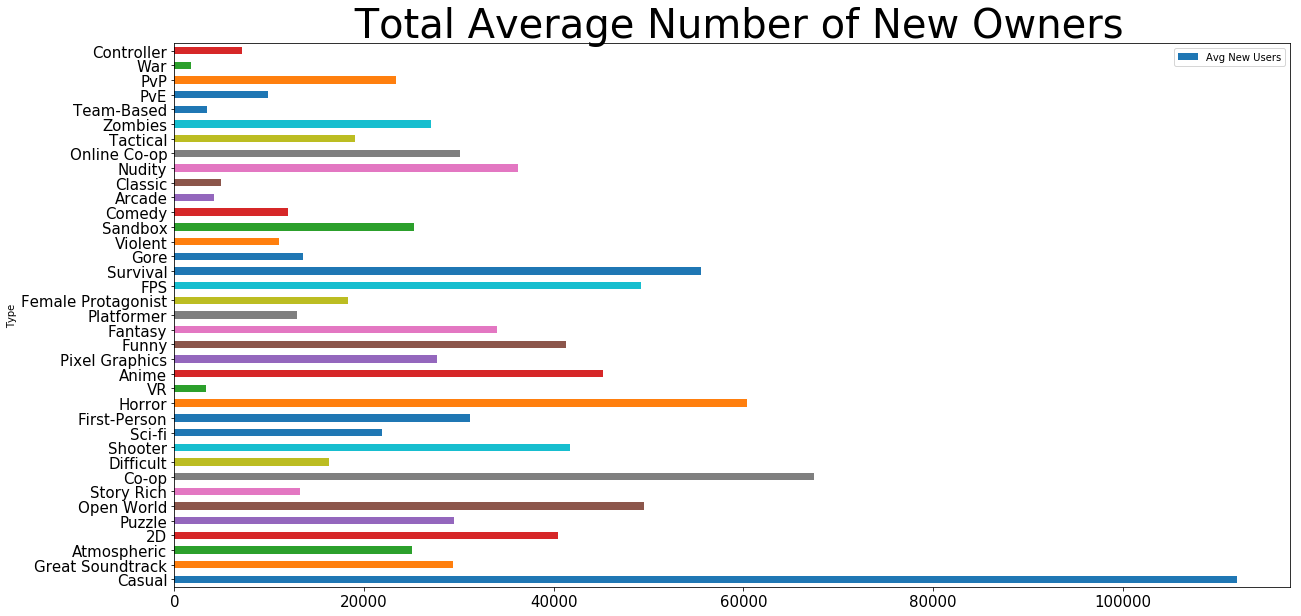

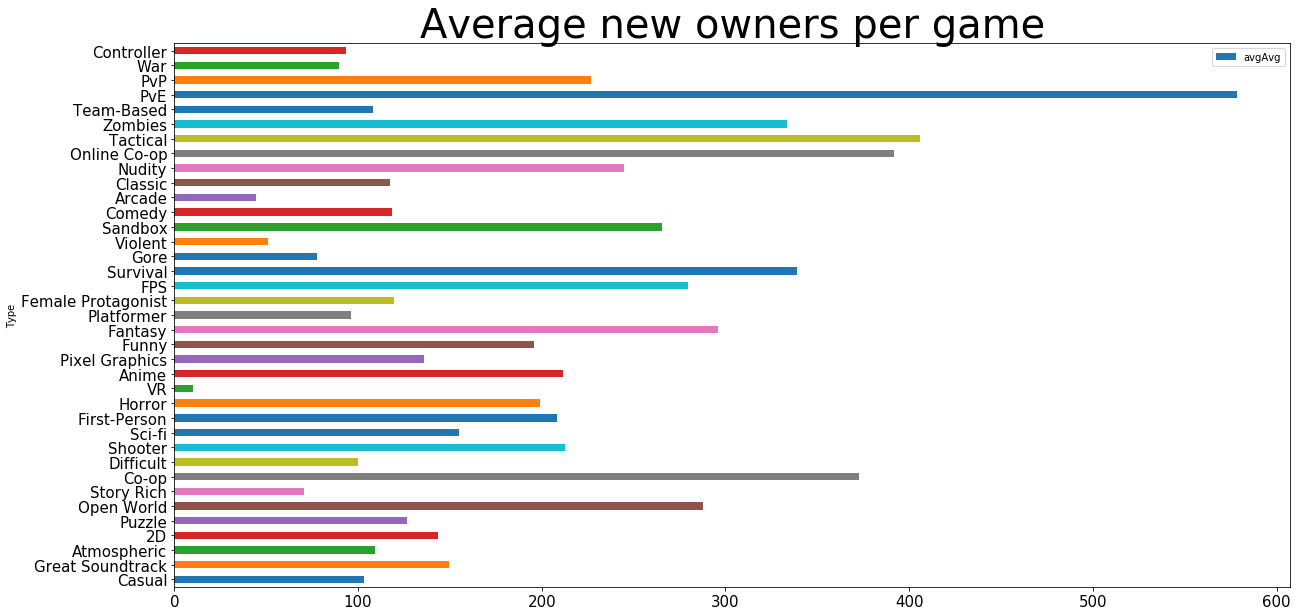

In [13]:
plotNewOwners(tags, tagNames, horizontal = True)

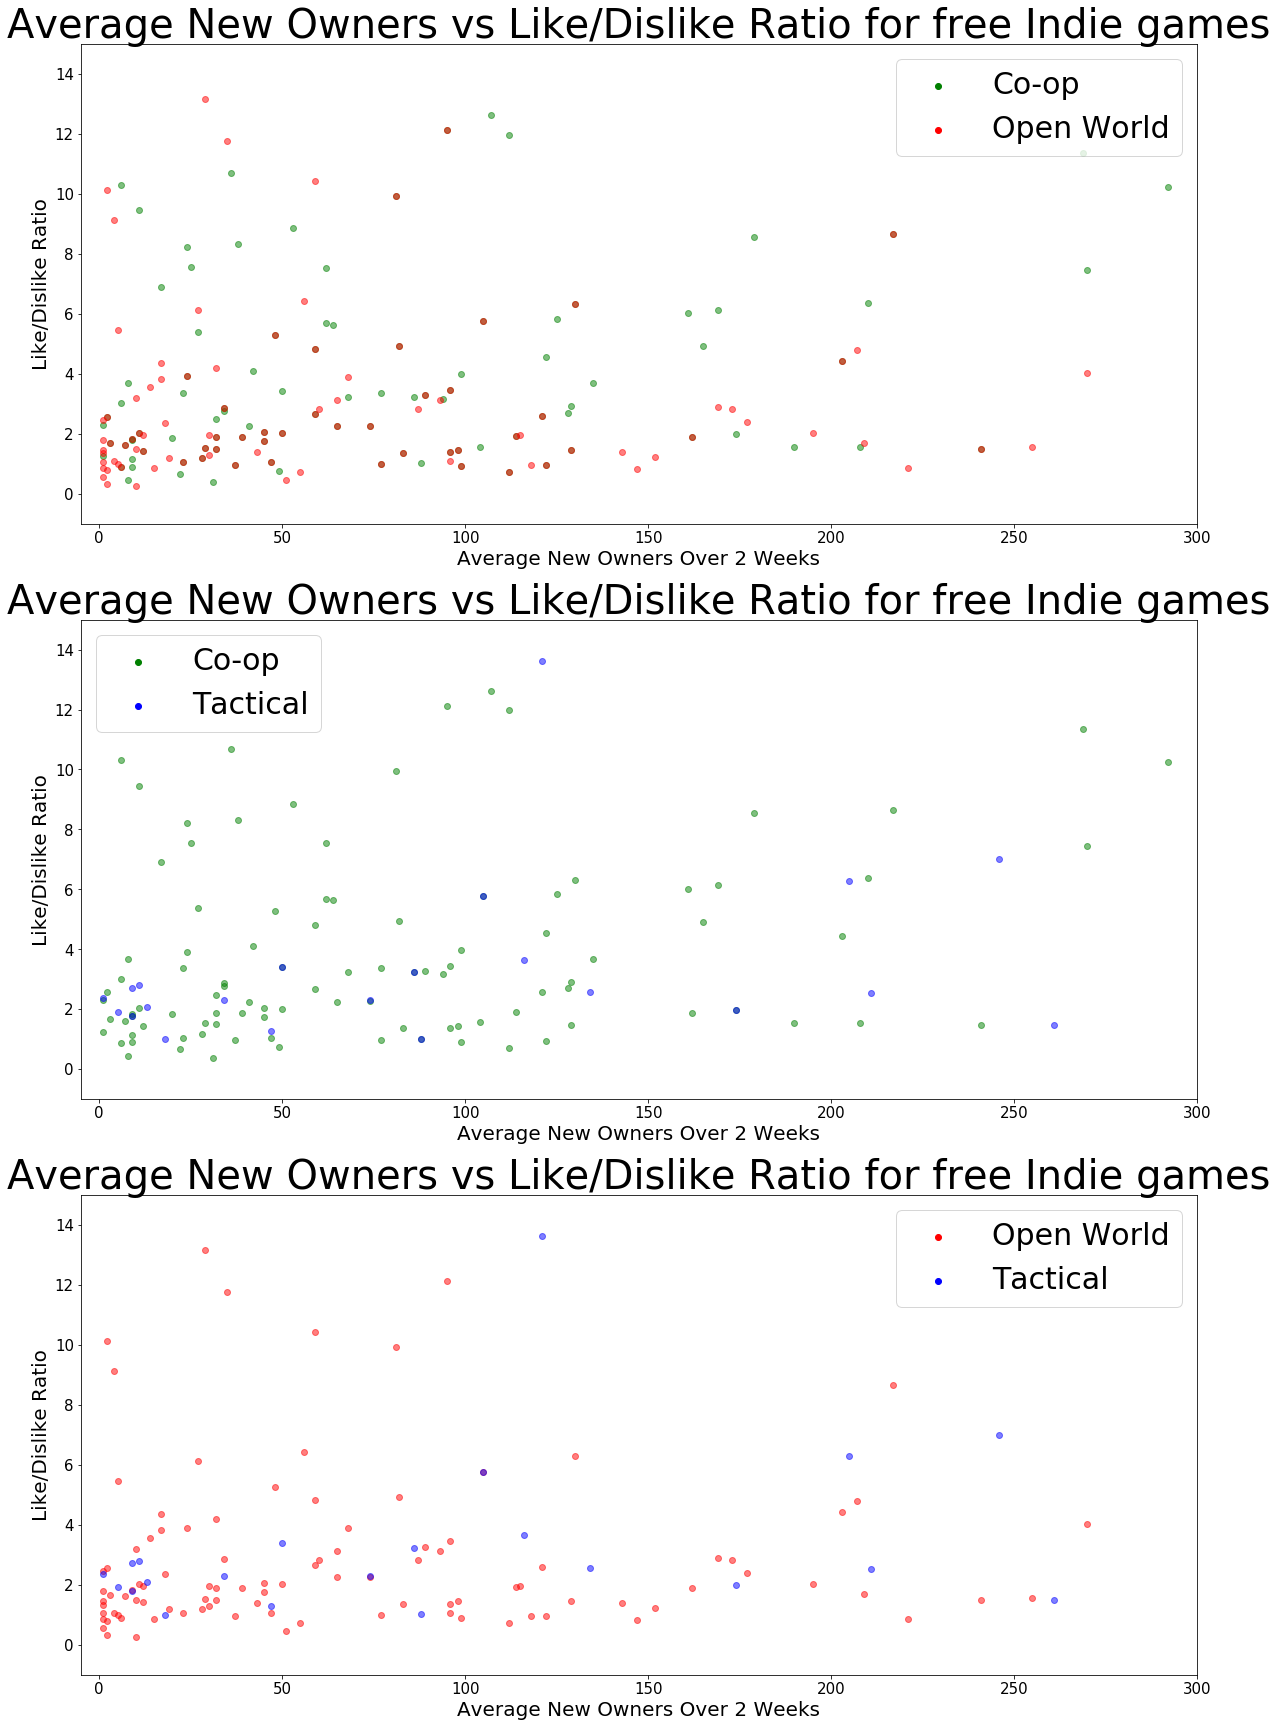

In [14]:
coop = remove0s(coop)
openWorld = remove0s(openWorld)
tactical = remove0s(tactical)
fig, ax = plt.subplots(3, 1, figsize=(20,30))

ax[0].scatter(coop['average_forever'], coop['Like/Dislike Ratio'], c= 'green', alpha=0.5)
ax[0].scatter(openWorld['average_forever'], openWorld['Like/Dislike Ratio'], c='red', alpha=0.5)
ax[0].set_xlim(-5, 300)
ax[0].set_ylim(-1, 15)
leg = ax[0].legend(['Co-op', 'Open World'], fontsize = 30)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax[0].set_title("Average New Owners vs Like/Dislike Ratio for free Indie games", fontsize = 40)
ax[0].set_xlabel("Average New Owners Over 2 Weeks", fontsize = 20)
ax[0].set_ylabel("Like/Dislike Ratio", fontsize = 20)
ax[0].tick_params(axis = 'both', labelsize = 15)

ax[1].scatter(coop['average_forever'], coop['Like/Dislike Ratio'], c= 'green', alpha=0.5)
ax[1].scatter(tactical['average_forever'], tactical['Like/Dislike Ratio'], c='blue', alpha=0.5)
ax[1].set_xlim(-5, 300)
ax[1].set_ylim(-1, 15)
leg = ax[1].legend(['Co-op','Tactical'], fontsize = 30)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax[1].set_title("Average New Owners vs Like/Dislike Ratio for free Indie games", fontsize = 40)
ax[1].set_xlabel("Average New Owners Over 2 Weeks", fontsize = 20)
ax[1].set_ylabel("Like/Dislike Ratio", fontsize = 20)
ax[1].tick_params(axis = 'both', labelsize = 15)

ax[2].scatter(openWorld['average_forever'], openWorld['Like/Dislike Ratio'], c= 'red', alpha=0.5)
ax[2].scatter(tactical['average_forever'], tactical['Like/Dislike Ratio'], c='blue', alpha=0.5)
ax[2].set_xlim(-5, 300)
ax[2].set_ylim(-1, 15)
leg = ax[2].legend(['Open World', 'Tactical'], fontsize = 30)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax[2].set_title("Average New Owners vs Like/Dislike Ratio for free Indie games", fontsize = 40)
ax[2].set_xlabel("Average New Owners Over 2 Weeks", fontsize = 20)
ax[2].set_ylabel("Like/Dislike Ratio", fontsize = 20)
ax[2].tick_params(axis = 'both', labelsize = 15)

In [15]:
tags = [openWorld, coop, shooter, firstPerson, fps, survival, sandbox, onlineCoop, zombies, pve, pvp, war, controller]
tagNames = ['Open World', 'Co-op', 'Shooter', 'First-Person', 'FPS', 'Survival', 'Sandbox', 'Online Co-op', 
           'Zombies', 'PvE', 'PvP', 'War', 'Controller']

Text(0, 0.5, 'Like/Dislike Ratio')

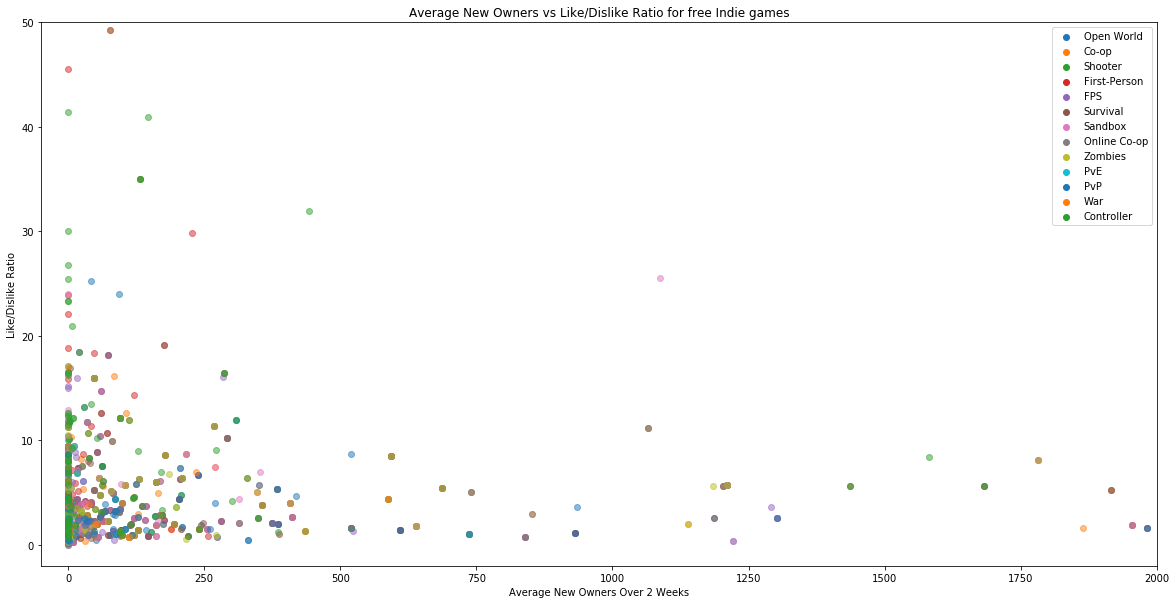

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
for tag in tags:
    ax.scatter(tag['average_forever'], tag['Like/Dislike Ratio'], alpha=0.5)
plt.xlim(-50, 2000)
plt.ylim(-2, 50)
leg = ax.legend(tagNames)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax.set_title("Average New Owners vs Like/Dislike Ratio for free Indie games")
ax.set_xlabel("Average New Owners Over 2 Weeks")
ax.set_ylabel("Like/Dislike Ratio")

Text(0, 0.5, 'Like/Dislike Ratio')

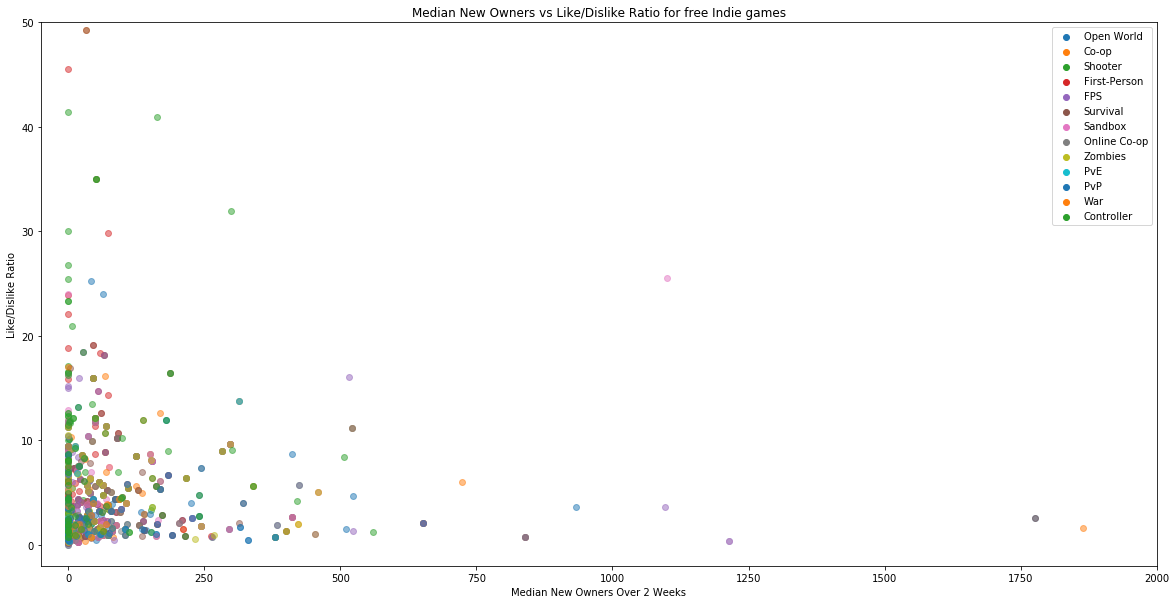

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
for tag in tags:
    ax.scatter(tag['median_forever'], tag['Like/Dislike Ratio'], alpha=0.5)
plt.xlim(-50, 2000)
plt.ylim(-2, 50)
leg = ax.legend(tagNames)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax.set_title("Median New Owners vs Like/Dislike Ratio for free Indie games")
ax.set_xlabel("Median New Owners Over 2 Weeks")
ax.set_ylabel("Like/Dislike Ratio")

Text(0, 0.5, 'Like/Dislike Ratio')

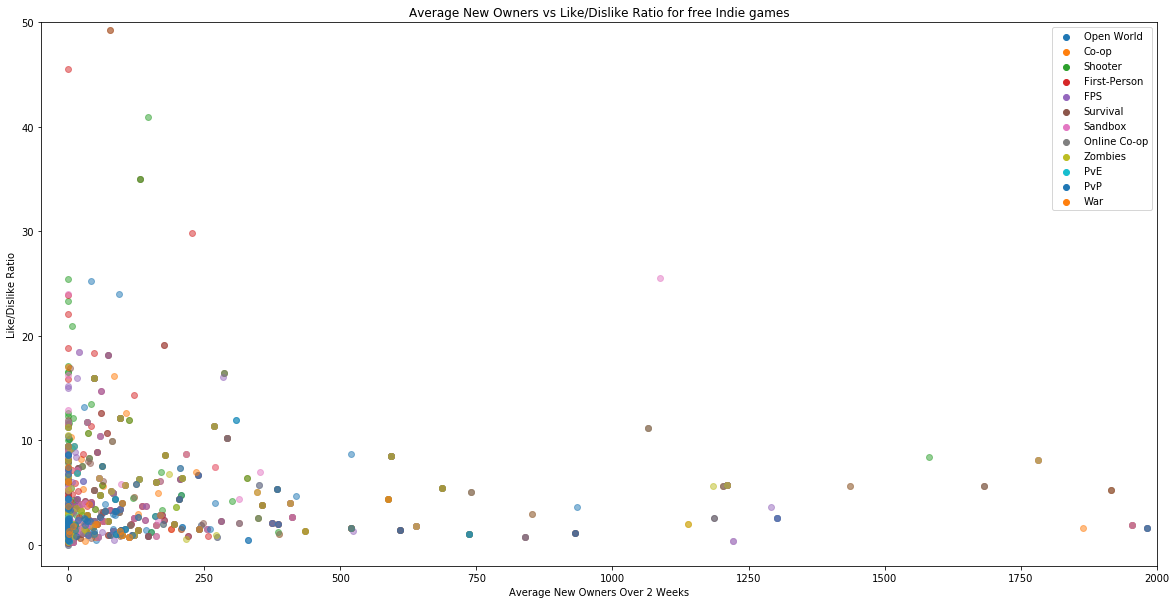

In [18]:
tags = [openWorld, coop, shooter, firstPerson, fps, survival, sandbox, onlineCoop, zombies, pve, pvp, war]
tagNames = ['Open World', 'Co-op', 'Shooter', 'First-Person', 'FPS', 'Survival', 'Sandbox', 'Online Co-op', 
           'Zombies', 'PvE', 'PvP', 'War']

fig, ax = plt.subplots(figsize=(20,10))
for tag in tags:
    ax.scatter(tag['average_forever'], tag['Like/Dislike Ratio'], alpha=0.5)
plt.xlim(-50, 2000)
plt.ylim(-2, 50)
leg = ax.legend(tagNames)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax.set_title("Average New Owners vs Like/Dislike Ratio for free Indie games")
ax.set_xlabel("Average New Owners Over 2 Weeks")
ax.set_ylabel("Like/Dislike Ratio")

In [19]:
openWorld0 = remove0s(openWorld)
coop0 = remove0s(coop)
shooter0 = remove0s(shooter)
firstPerson0 = remove0s(firstPerson)
fps0 = remove0s(fps)
survival0 = remove0s(survival)
sandbox0 = remove0s(sandbox)
onlineCoop0 = remove0s(onlineCoop)
zombies0 = remove0s(zombies)
pve0 = remove0s(pve)
pvp0 = remove0s(pvp)
war0 = remove0s(war)
controller0 = remove0s(controller)

In [20]:
tags = [openWorld0, coop0, shooter0, firstPerson0, fps0, survival0, sandbox0, onlineCoop0, 
        zombies0, pve0, pvp0, war0]
tagNames = ['Open World', 'Co-op', 'Shooter', 'First-Person', 'FPS', 'Survival', 'Sandbox', 'Online Co-op', 
           'Zombies', 'PvE', 'PvP', 'War']

Text(0, 0.5, 'Like/Dislike Ratio')

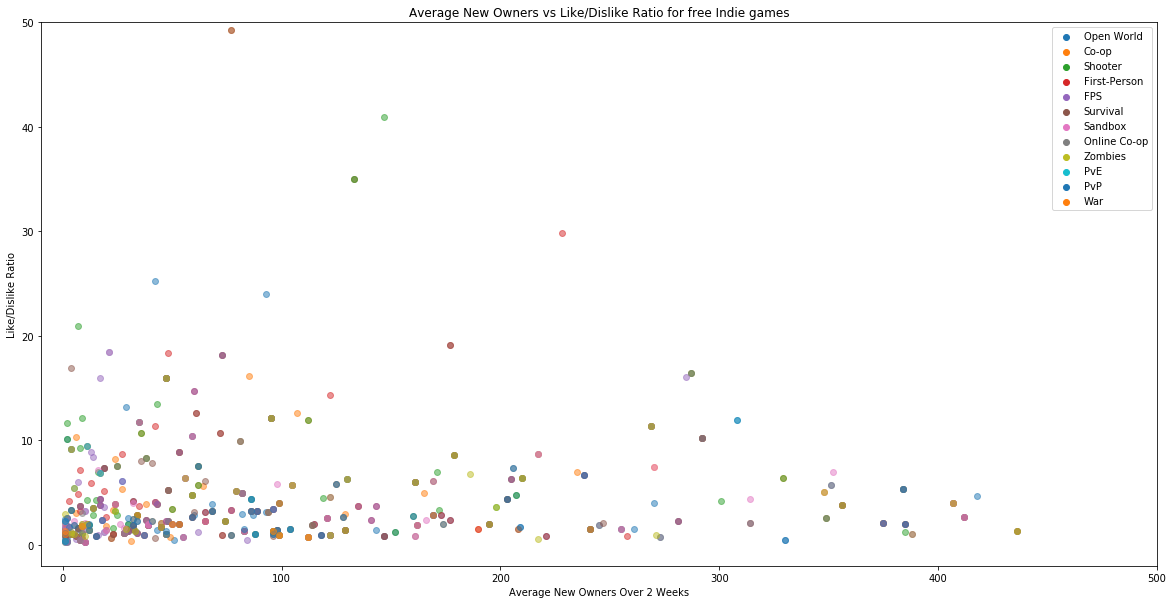

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
for tag in tags:
    ax.scatter(tag['average_forever'], tag['Like/Dislike Ratio'], alpha=0.5)
plt.xlim(-10, 500)
plt.ylim(-2, 50)
leg = ax.legend(tagNames)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax.set_title("Average New Owners vs Like/Dislike Ratio for free Indie games")
ax.set_xlabel("Average New Owners Over 2 Weeks")
ax.set_ylabel("Like/Dislike Ratio")

In [22]:
tags = [onlineCoop, zombies, pve]
tagNames = ['Online Co-op', 'Zombies', 'PvE']

Text(0, 0.5, 'Like/Dislike Ratio')

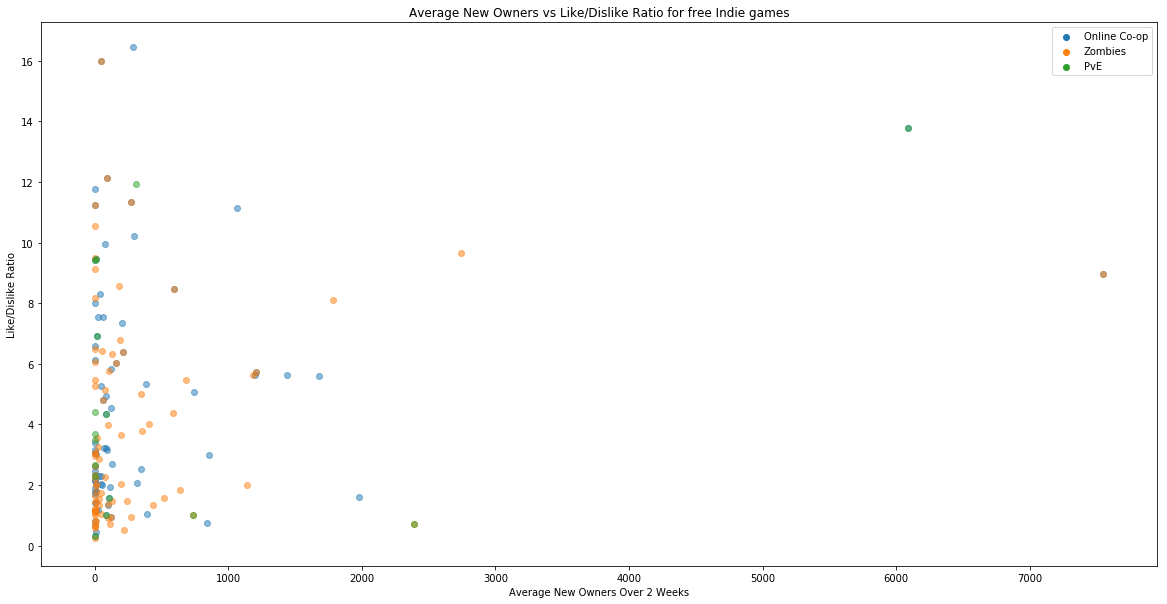

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
for tag in tags:
    ax.scatter(tag['average_forever'], tag['Like/Dislike Ratio'], alpha=0.5)
#plt.xlim(-10, 500)
#plt.ylim(-2, 50)
leg = ax.legend(tagNames)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax.set_title("Average New Owners vs Like/Dislike Ratio for free Indie games")
ax.set_xlabel("Average New Owners Over 2 Weeks")
ax.set_ylabel("Like/Dislike Ratio")

In [24]:
tags = [onlineCoop0, zombies0, pve0]
tagNames = ['Online Co-op', 'Zombies', 'PvE']

Text(0, 0.5, 'Like/Dislike Ratio')

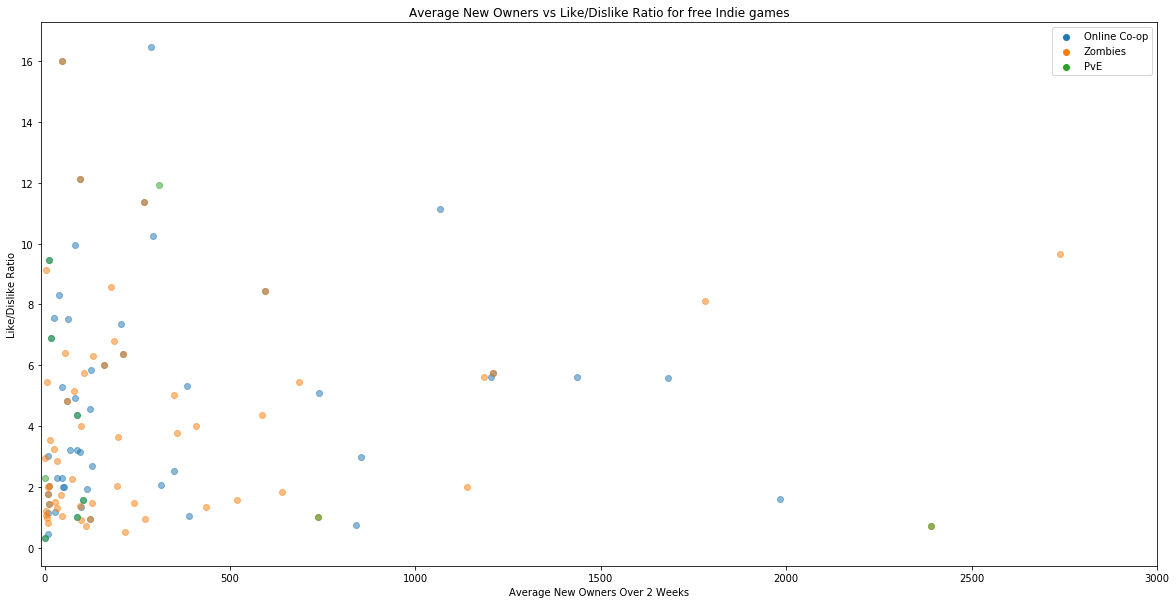

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
for tag in tags:
    ax.scatter(tag['average_forever'], tag['Like/Dislike Ratio'], alpha=0.5)
plt.xlim(-10, 3000)
#plt.ylim(-2, 50)
leg = ax.legend(tagNames)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax.set_title("Average New Owners vs Like/Dislike Ratio for free Indie games")
ax.set_xlabel("Average New Owners Over 2 Weeks")
ax.set_ylabel("Like/Dislike Ratio")

Text(0, 0.5, 'Like/Dislike Ratio')

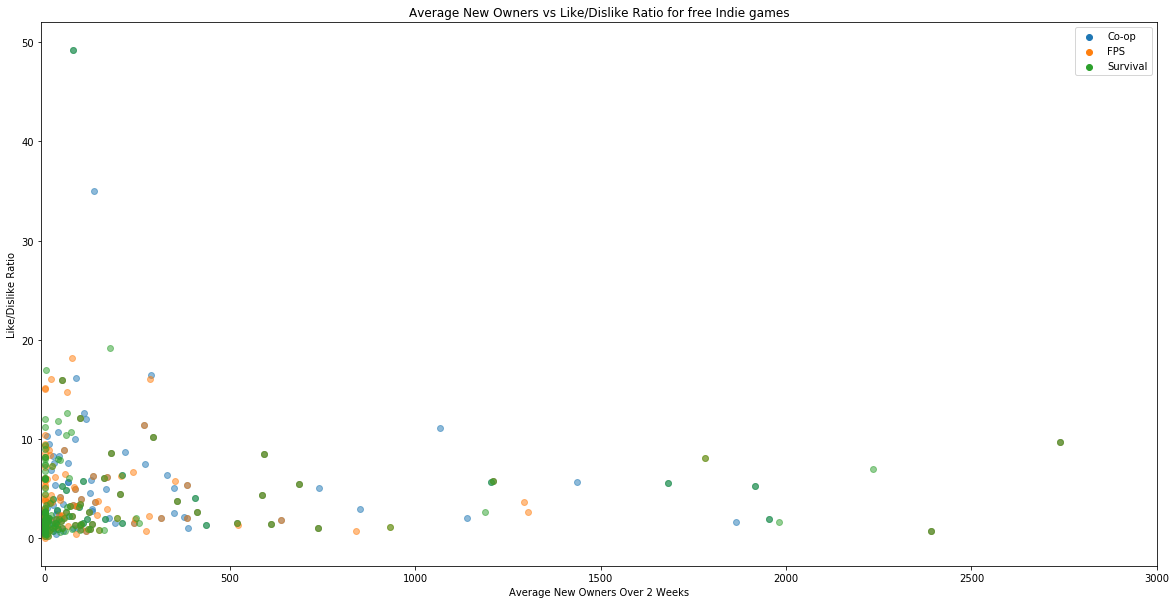

In [26]:
tags = [coop, fps, survival]
tagNames = ['Co-op', 'FPS', 'Survival']
fig, ax = plt.subplots(figsize=(20,10))
for tag in tags:
    ax.scatter(tag['average_forever'], tag['Like/Dislike Ratio'], alpha=0.5)
plt.xlim(-10, 3000)
#plt.ylim(-2, 50)
leg = ax.legend(tagNames)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax.set_title("Average New Owners vs Like/Dislike Ratio for free Indie games")
ax.set_xlabel("Average New Owners Over 2 Weeks")
ax.set_ylabel("Like/Dislike Ratio")

Text(0, 0.5, 'Like/Dislike Ratio')

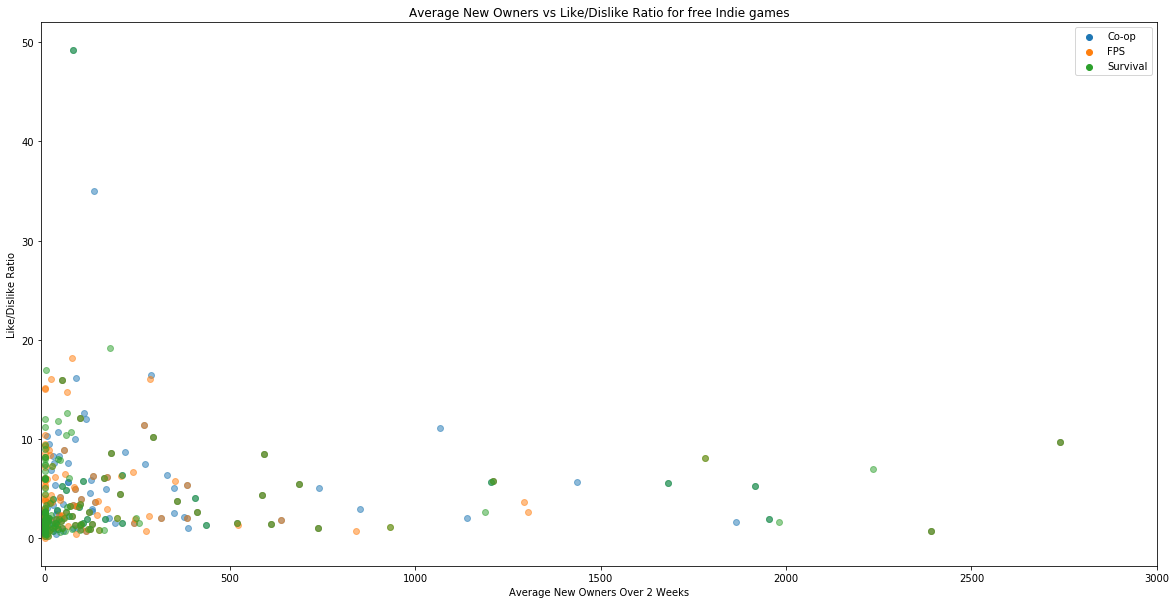

In [27]:
tags = [coop, fps, survival]
tags0 = []
for tag in tags:
    tags0.append(remove0s(tag))
tagNames = ['Co-op', 'FPS', 'Survival']
fig, ax = plt.subplots(figsize=(20,10))
for tag in tags:
    ax.scatter(tag['average_forever'], tag['Like/Dislike Ratio'], alpha=0.5)
plt.xlim(-10, 3000)
#plt.ylim(-2, 50)
leg = ax.legend(tagNames)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax.set_title("Average New Owners vs Like/Dislike Ratio for free Indie games")
ax.set_xlabel("Average New Owners Over 2 Weeks")
ax.set_ylabel("Like/Dislike Ratio")